In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [2]:
X = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')
print(X.shape)

(440, 128, 67)


In [3]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(440, 128, 67, 1)


In [4]:
df = pd.read_csv("../../data/processed_data/metadata.csv")
category_to_number = {'brushing': 0, 'food': 1, 'isolation': 2}

# Create a new column with numerical values based on the mapping
df['numerical_situation'] = df['situation'].map(category_to_number)

y = df['numerical_situation'].values


In [5]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [7]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/100
1/1 [==============================] - 1s 592ms/step - loss: 6.1783 - accuracy: 0.5085 - val_loss: 61.6274 - val_accuracy: 0.3051
Epoch 2/100
1/1 [==============================] - 0s 272ms/step - loss: 64.8046 - accuracy: 0.2607 - val_loss: 24.2542 - val_accuracy: 0.3051
Epoch 3/100
1/1 [==============================] - 0s 272ms/step - loss: 25.6242 - accuracy: 0.2607 - val_loss: 14.1942 - val_accuracy: 0.2203
Epoch 4/100
1/1 [==============================] - 0s 275ms/step - loss: 14.3324 - accuracy: 0.2308 - val_loss: 9.1260 - val_accuracy: 0.2203
Epoch 5/100
1/1 [==============================] - 0s 271ms/step - loss: 8.8880 - accuracy: 0.2308 - val_loss: 4.4144 - val_accuracy: 0.2203
Epoch 6/100
1/1 [==============================] - 0s 267ms/step - loss: 4.1535 - accuracy: 0.2308 - val_loss: 2.3992 - val_accuracy: 0.2203
Epoch 7/100
1/1 [==============================] - 0s 270ms/step - loss: 2.1928 - accuracy: 0.2308 - val_loss: 1.6096 - val_accuracy: 0.4661
Epoch 8

Epoch 59/100
1/1 [==============================] - 0s 293ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.1672 - val_accuracy: 0.7119
Epoch 60/100
1/1 [==============================] - 0s 280ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.1993 - val_accuracy: 0.7034
Epoch 61/100
1/1 [==============================] - 0s 265ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.2300 - val_accuracy: 0.7034
Epoch 62/100
1/1 [==============================] - 0s 265ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.2552 - val_accuracy: 0.7034
Epoch 63/100
1/1 [==============================] - 0s 267ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.2769 - val_accuracy: 0.7034
Epoch 64/100
1/1 [==============================] - 0s 271ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.3047 - val_accuracy: 0.6780
Epoch 65/100
1/1 [==============================] - 0s 269ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.3294 - val_accuracy: 0.6780
Epoch 

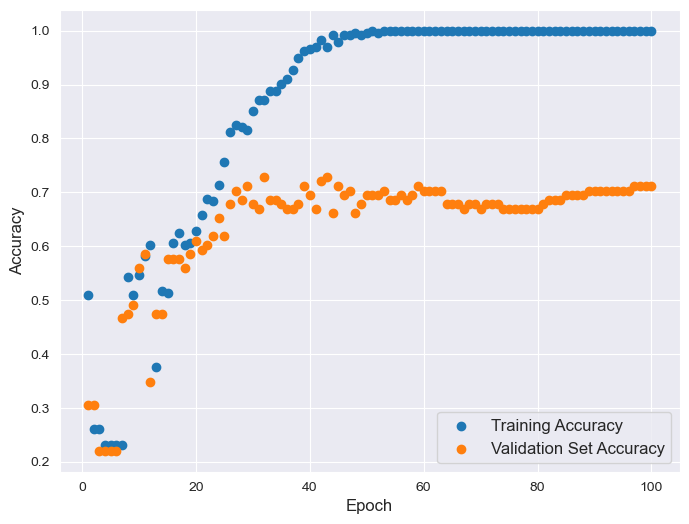

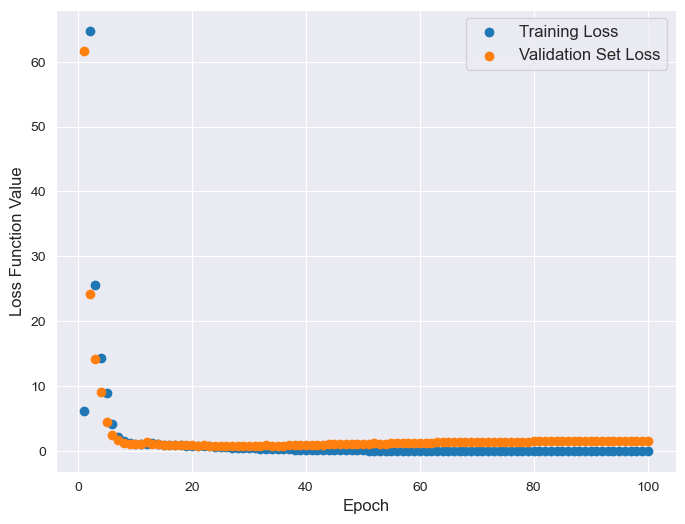

Epoch 1/100
1/1 [==============================] - 1s 535ms/step - loss: 1.9429 - accuracy: 0.5191 - val_loss: 48.7283 - val_accuracy: 0.2906
Epoch 2/100
1/1 [==============================] - 0s 278ms/step - loss: 54.7246 - accuracy: 0.2681 - val_loss: 22.1455 - val_accuracy: 0.2564
Epoch 3/100
1/1 [==============================] - 0s 271ms/step - loss: 24.8030 - accuracy: 0.2128 - val_loss: 7.2868 - val_accuracy: 0.2564
Epoch 4/100
1/1 [==============================] - 0s 266ms/step - loss: 8.0457 - accuracy: 0.2170 - val_loss: 4.2734 - val_accuracy: 0.2906
Epoch 5/100
1/1 [==============================] - 0s 266ms/step - loss: 4.3635 - accuracy: 0.2681 - val_loss: 1.3679 - val_accuracy: 0.2906
Epoch 6/100
1/1 [==============================] - 0s 263ms/step - loss: 1.3301 - accuracy: 0.2681 - val_loss: 1.0976 - val_accuracy: 0.3162
Epoch 7/100
1/1 [==============================] - 0s 261ms/step - loss: 1.0671 - accuracy: 0.2979 - val_loss: 0.9877 - val_accuracy: 0.4957
Epoch 8/1

Epoch 59/100
1/1 [==============================] - 0s 278ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.6062 - val_accuracy: 0.6581
Epoch 60/100
1/1 [==============================] - 0s 261ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6384 - val_accuracy: 0.6581
Epoch 61/100
1/1 [==============================] - 0s 262ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6681 - val_accuracy: 0.6581
Epoch 62/100
1/1 [==============================] - 0s 259ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6908 - val_accuracy: 0.6667
Epoch 63/100
1/1 [==============================] - 0s 258ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.7055 - val_accuracy: 0.6667
Epoch 64/100
1/1 [==============================] - 0s 259ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7158 - val_accuracy: 0.6667
Epoch 65/100
1/1 [==============================] - 0s 260ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7244 - val_accuracy: 0.6667
Epoch 

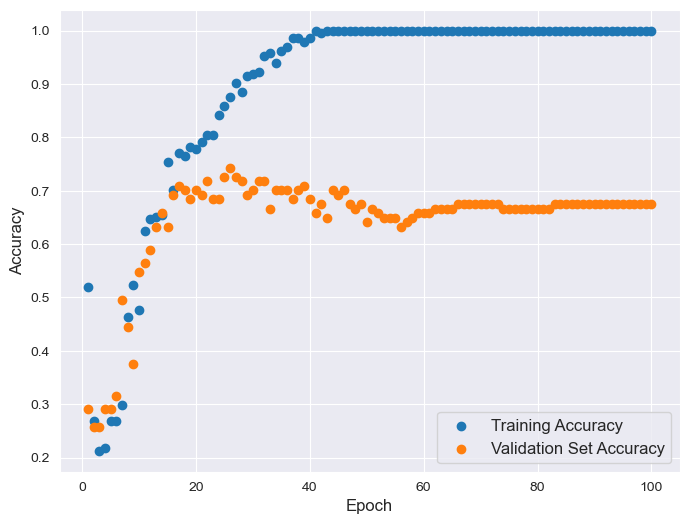

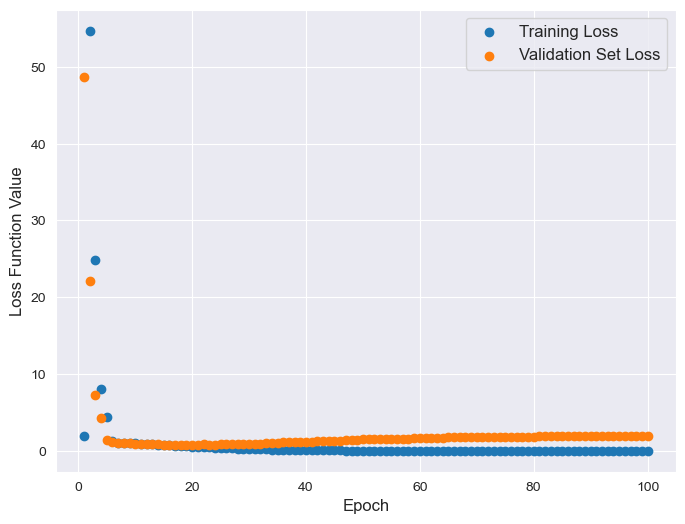

Epoch 1/100
1/1 [==============================] - 0s 452ms/step - loss: 12.5845 - accuracy: 0.4638 - val_loss: 115.2601 - val_accuracy: 0.2308
Epoch 2/100
1/1 [==============================] - 0s 267ms/step - loss: 101.0630 - accuracy: 0.2979 - val_loss: 63.1130 - val_accuracy: 0.2308
Epoch 3/100
1/1 [==============================] - 0s 265ms/step - loss: 53.2770 - accuracy: 0.2979 - val_loss: 40.6233 - val_accuracy: 0.2051
Epoch 4/100
1/1 [==============================] - 0s 266ms/step - loss: 35.3732 - accuracy: 0.2383 - val_loss: 18.5055 - val_accuracy: 0.2051
Epoch 5/100
1/1 [==============================] - 0s 263ms/step - loss: 16.3328 - accuracy: 0.2383 - val_loss: 3.1787 - val_accuracy: 0.2051
Epoch 6/100
1/1 [==============================] - 0s 263ms/step - loss: 2.8382 - accuracy: 0.2383 - val_loss: 1.0982 - val_accuracy: 0.2137
Epoch 7/100
1/1 [==============================] - 0s 265ms/step - loss: 1.0976 - accuracy: 0.2681 - val_loss: 0.9929 - val_accuracy: 0.5641
Ep

Epoch 59/100
1/1 [==============================] - 0s 268ms/step - loss: 0.2692 - accuracy: 0.9064 - val_loss: 0.6397 - val_accuracy: 0.7692
Epoch 60/100
1/1 [==============================] - 0s 265ms/step - loss: 0.2664 - accuracy: 0.9064 - val_loss: 0.6588 - val_accuracy: 0.7692
Epoch 61/100
1/1 [==============================] - 0s 266ms/step - loss: 0.2507 - accuracy: 0.9191 - val_loss: 0.6827 - val_accuracy: 0.7607
Epoch 62/100
1/1 [==============================] - 0s 263ms/step - loss: 0.2493 - accuracy: 0.9064 - val_loss: 0.6428 - val_accuracy: 0.7778
Epoch 63/100
1/1 [==============================] - 0s 263ms/step - loss: 0.2387 - accuracy: 0.9277 - val_loss: 0.6317 - val_accuracy: 0.7692
Epoch 64/100
1/1 [==============================] - 0s 265ms/step - loss: 0.2327 - accuracy: 0.9234 - val_loss: 0.6569 - val_accuracy: 0.7607
Epoch 65/100
1/1 [==============================] - 0s 269ms/step - loss: 0.2204 - accuracy: 0.9277 - val_loss: 0.7071 - val_accuracy: 0.7692
Epoch 

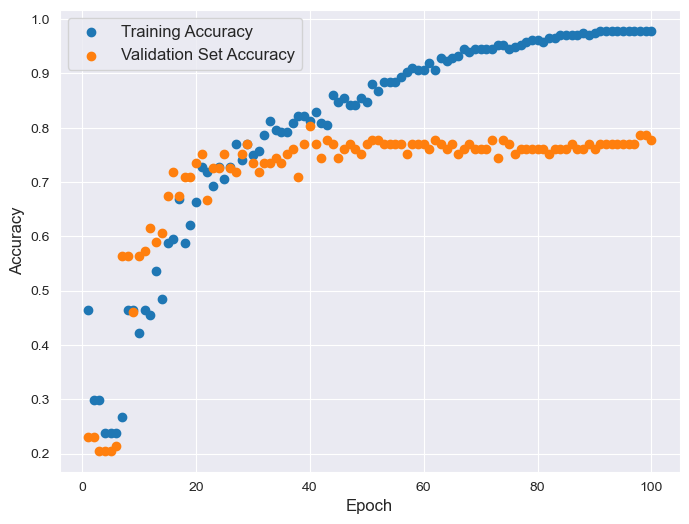

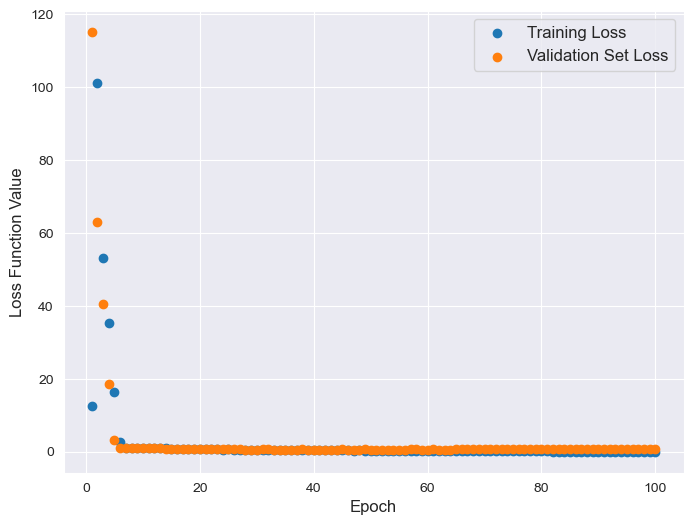

In [8]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=100

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(16, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(32, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides=2) )
    
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(32, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=int(len(y_tt)),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)

In [12]:

model = models.Sequential()
model.add( layers.Conv2D(16, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(32, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides=2) )

model.add( layers.Flatten() )
model.add(layers.Dense(32, activation='relu'))

## Finally an output layer
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

epochs = 40

history = model.fit(X_train, 
                          to_categorical(y_train), 
                          epochs=epochs, 
                          batch_size=len(y_train),
                          )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/40
1/1 [==============================] - 1s 994ms/step - loss: 4.5233 - accuracy: 0.2074
Epoch 2/40
1/1 [==============================] - 1s 500ms/step - loss: 25.1061 - accuracy: 0.2869
Epoch 3/40
1/1 [==============================] - 1s 557ms/step - loss: 33.5730 - accuracy: 0.5028
Epoch 4/40
1/1 [==============================] - 1s 569ms/step - loss: 24.3961 - accuracy: 0.5028
Epoch 5/40
1/1 [==============================] - 1s 525ms/step - loss: 12.5413 - accuracy: 0.5028
Epoch 6/40
1/1 [==============================] - 1s 548ms/step - loss: 4.3762 - accuracy: 0.5028
Epoch 7/40
1/1 [==============================] - 1s 762ms/step - loss: 1.8025 - accuracy: 0.5000
Epoch 8/40
1/1 [==============================] - 1s 1s/step - loss: 1.3051 - accuracy: 0.4119
Epoch 9/40
1/1 [==============================] - 1s 592ms/step - loss: 1.0293 - accuracy: 0.4318
Epoch 10/40
1/1 [==============================] - 0s 464ms/step - loss: 1.0032 - accuracy: 0.4716
Epoch 11/40
1/1 [=

In [13]:
model.evaluate(X_test,to_categorical(y_test))

3/3 [==============================] - 0s 10ms/step - loss: 0.9121 - accuracy: 0.6591


[0.9120716452598572, 0.6590909361839294]